In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
from collections import defaultdict

In [6]:
data = pd.read_csv('data/stock_data.csv')
ticker_info = pd.read_csv('data/ticker_info.csv')
data

,date,ticker,open,high,low,close,volume,outstanding_share,turnover,pe,pe_ttm,pb,ps,ps_ttm,dv_ratio,dv_ttm,total_mv,qfq_factor
0,2005-01-04,sh600000,0.77,0.77,0.75,0.76,3808939.0,900000000.0,0.004232,17.1990,14.4219,2.0777,3.1439,2.2097,6.9549,6.9549,2693520.00,8.895254
1,2005-01-05,sh600000,0.76,0.76,0.74,0.75,5225244.0,900000000.0,0.005806,16.9240,14.1913,2.0445,3.0937,2.1744,7.0679,7.0679,2650455.00,8.895254
2,2005-01-06,sh600000,0.75,0.75,0.73,0.74,4298099.0,900000000.0,0.004776,16.6991,14.0026,2.0173,3.0525,2.1455,7.1632,7.1632,2615220.00,8.895254
3,2005-01-07,sh600000,0.74,0.75,0.73,0.74,4362864.0,900000000.0,0.004848,16.7491,14.0446,2.0233,3.0617,2.1519,7.1418,7.1418,2623050.00,8.895254
4,2005-01-10,sh600000,0.75,0.77,0.74,0.77,7115260.0,900000000.0,0.007906,17.3240,14.0575,2.0082,3.1668,2.2258,6.9048,6.9048,2713095.00,8.895254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10129339,2022-05-05,sz301288,26.35,29.37,25.80,28.50,11306390.0,23516089.0,0.480794,43.3468,42.7303,3.7789,14.3554,15.0075,NaN,NaN,307828.50,1.000000
10129340,2022-05-06,sz301288,27.14,31.33,27.12,29.19,12257115.0,23516089.0,0.521223,44.3962,43.7649,3.8704,14.7029,15.3709,NaN,NaN,315281.19,1.000000
10129341,2022-05-09,sz301288,30.52,34.00,29.07,32.74,12512878.0,23516089.0,0.532099,49.7956,49.0874,4.3411,16.4911,17.2402,NaN,NaN,353624.74,1.000000
10129342,2022-05-10,sz301288,31.49,36.99,30.49,35.77,13962822.0,23516089.0,0.593756,54.4040,53.6303,4.7429,18.0173,18.8357,NaN,NaN,386351.77,1.000000


Set new index as column date.

In [24]:
data.reset_index(drop = False, inplace = True)
data['date']= pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.head()

,index,ticker,open,high,low,close,volume,outstanding_share,turnover,pe,pe_ttm,pb,ps,ps_ttm,dv_ratio,dv_ttm,total_mv,qfq_factor
date,,,,,,,,,,,,,,,,,,
2005-01-04,0,sh600000,0.77,0.77,0.75,0.76,3808939.0,900000000.0,0.004232,17.1990,14.4219,2.0777,3.1439,2.2097,6.9549,6.9549,2693520.0,8.895254
2005-01-05,1,sh600000,0.76,0.76,0.74,0.75,5225244.0,900000000.0,0.005806,16.9240,14.1913,2.0445,3.0937,2.1744,7.0679,7.0679,2650455.0,8.895254
2005-01-06,2,sh600000,0.75,0.75,0.73,0.74,4298099.0,900000000.0,0.004776,16.6991,14.0026,2.0173,3.0525,2.1455,7.1632,7.1632,2615220.0,8.895254
2005-01-07,3,sh600000,0.74,0.75,0.73,0.74,4362864.0,900000000.0,0.004848,16.7491,14.0446,2.0233,3.0617,2.1519,7.1418,7.1418,2623050.0,8.895254
2005-01-10,4,sh600000,0.75,0.77,0.74,0.77,7115260.0,900000000.0,0.007906,17.3240,14.0575,2.0082,3.1668,2.2258,6.9048,6.9048,2713095.0,8.895254


In [9]:
test_set = data.loc['2021']
test_set.head()

,index,ticker,open,high,low,close,volume,outstanding_share,turnover,pe,pe_ttm,pb,ps,ps_ttm,dv_ratio,dv_ttm,total_mv,qfq_factor
date,,,,,,,,,,,,,,,,,,
2021-01-04,3787,sh600000,9.18,9.26,9.09,9.22,62906939.0,2.935214e+10,0.002143,4.8280,5.1430,0.5574,1.4916,1.4734,6.1919,6.1919,2.844222e+07,1.0
2021-01-05,3788,sh600000,9.21,9.21,9.06,9.21,53859177.0,2.935214e+10,0.001835,4.8230,5.1377,0.5568,1.4900,1.4719,6.1983,6.1983,2.841287e+07,1.0
2021-01-06,3789,sh600000,9.16,9.36,9.16,9.35,61881321.0,2.935214e+10,0.002108,4.8928,5.2120,0.5649,1.5116,1.4932,6.1100,6.1100,2.882380e+07,1.0
2021-01-07,3790,sh600000,9.36,9.45,9.20,9.34,57090442.0,2.935214e+10,0.001945,4.8878,5.2067,0.5643,1.5100,1.4917,6.1162,6.1162,2.879445e+07,1.0
2021-01-08,3791,sh600000,9.36,9.42,9.26,9.36,55801455.0,2.935214e+10,0.001901,4.8978,5.2173,0.5655,1.5131,1.4947,6.1038,6.1038,2.885315e+07,1.0


Defined monthly return as

$\text{Monthly Return} = \frac{\text{closing price on last day of month}}{\text{closing price on last day of previous month}} - 1$

In [10]:
def get_monthly_close_prices_for_ticker(cur_ticker, test_set):
    ticker_set = test_set.loc[test_set['ticker'] == cur_ticker]
    monthly_close_prices_for_ticker = []
    months = ticker_set.index.month
    for i in range(len(months)):
        if (i == len(months) - 1 or months[i] != months[i + 1]):
            monthly_close_prices_for_ticker.append(ticker_set.iloc[i]['close'])
    return monthly_close_prices_for_ticker

Let $t$ denote time measured in the units of $1$ month, with $t = 0$ corresponding to the most recent time. Let $P_i(t)$ be the time series of prices (fully adjusted for splits and dividends) for the stock labeled by $i$ ($i = 1,...,N,$ where $N$ is the number of stocks in market).
Let $$ R_i(t) = \frac{P_i(t)}{P_i(t + 1)} - 1 $$
$$ R_i^{cum} = \frac{P_i(S)}{P_i(S + T)} - 1 $$
$$ R_i^{mean} = \frac{1}{T} \sum_{t = S}^{S + T - 1} R_i(t) $$
$$ \sigma^2 = \frac{1}{T - 1} \sum_{t = S}^{S + T - 1} (R_i(t) - R_i^{mean})^2 $$
$$ R_i^{risk.adj} = \frac{R_i^{mean}}{\sigma_i}$$

Where:
1. $R_i(t)$ is the monthly return;
2. $R_i^{cum}$ is the cumulative return computed over the $T$-month "formation period" (in our case $T = 10$) skipping the most recent $S$-month "skip period" (in our case $S = 1$);
3. $R_i^{mean}$ is the mean monthly return computed over the formation period;
4. $R_i^{risk.adj}$ is the risk-adjusted mean return over the formation period.\
$\sigma_i$ is the monthly volatility calculated over the formation period

In [11]:
def get_ticker_return(ticker, monthly_close_prices_for_ticker, S, T):
    end_price = monthly_close_prices_for_ticker[12 - S - 1]
    start_price = monthly_close_prices_for_ticker[12 - (S + T) - 1]
    return end_price / start_price - 1 

def get_mean_return(ticker, monthly_close_prices_for_ticker, S, T):
    mean_return = 0
    for i in range(S, S + T):
        mean_return += monthly_close_prices_for_ticker[12 - i - 1] / monthly_close_prices_for_ticker[12 - i - 2] - 1
    return mean_return / T

def get_risk_adjusted_mean(ticker, monthly_close_prices_for_ticker, S, T, mean_return):
    risk_adjusted_mean = 0
    for i in range(S, S + T):
        risk_adjusted_mean += ((monthly_close_prices_for_ticker[12 - i - 1] / monthly_close_prices_for_ticker[12 - i - 2] - 1) - mean_return) ** 2
    sigma = math.sqrt(risk_adjusted_mean / (T - 1))
    return mean_return / sigma
    
def get_cumulative_return(ticker, monthly_close_prices_for_ticker):
    S = 1
    T = 10
    return get_ticker_return(ticker, monthly_close_prices_for_ticker, S, T)

In [12]:
# There are stocks that we don't trade 12 months. it's assumed that we will skip such securities
get_monthly_close_prices_for_ticker('sz301056', test_set)

[11.12, 10.84, 11.87, 11.53]

In [13]:
def get_all_strategy_returns(test_set, debug = 0):
    cumulative_map = {}
    mean_map = {}
    risk_adjusted_mean_map = {}

    cnt = len(set(test_set['ticker']))
    for ticker in set(test_set['ticker']):
        monthly_close_prices_for_ticker = get_monthly_close_prices_for_ticker(ticker, test_set)
        if (len(monthly_close_prices_for_ticker) != 12):
            if (debug):
                print(f"{ticker} wasn't started trading from the first month of the year")
                print('skipped')
            cnt -= 1
            continue
        cumulative_map[ticker] = get_cumulative_return(ticker, monthly_close_prices_for_ticker)
        mean_map[ticker] = get_mean_return(ticker, monthly_close_prices_for_ticker, 1, 10)
        risk_adjusted_mean_map[ticker] = get_risk_adjusted_mean(ticker, monthly_close_prices_for_ticker, 1, 10, mean_map[ticker])
        cnt -= 1
        if (debug):
            print(f'still have {cnt} cells')
    
    df_cumulative_returns = pd.DataFrame.from_dict(cumulative_map, orient='index', columns=['cumulative returns'])
    df_cumulative_returns['ticker'] = df_cumulative_returns.index
    columns_titles = ["ticker",'cumulative returns']
    df_cumulative_returns=df_cumulative_returns.reindex(columns=columns_titles)
    df_cumulative_returns.reset_index(inplace=True, drop=True)

    df_mean_returns = pd.DataFrame.from_dict(mean_map, orient='index', columns=['mean returns'])
    df_mean_returns['ticker'] = df_mean_returns.index
    columns_titles = ["ticker",'mean returns']
    df_mean_returns = df_mean_returns.reindex(columns=columns_titles)
    df_mean_returns.reset_index(inplace=True, drop=True)

    df_risk_adjusted_mean_returns = pd.DataFrame.from_dict(risk_adjusted_mean_map, orient='index', columns=['risk-adjusted mean returns'])
    df_risk_adjusted_mean_returns['ticker'] = df_risk_adjusted_mean_returns.index
    columns_titles = ["ticker",'risk-adjusted mean returns']
    df_risk_adjusted_mean_returns = df_risk_adjusted_mean_returns.reindex(columns=columns_titles)
    df_risk_adjusted_mean_returns.reset_index(inplace=True, drop=True)

    df_cumulative_returns.sort_values(by=['cumulative returns'], ascending=False, inplace=True)
    df_cumulative_returns.reset_index(inplace=True, drop=True)

    df_mean_returns.sort_values(by=['mean returns'], ascending=False, inplace=True)
    df_mean_returns.reset_index(inplace=True, drop=True)

    df_risk_adjusted_mean_returns.sort_values(by=['risk-adjusted mean returns'], ascending=False, inplace=True)
    df_risk_adjusted_mean_returns.reset_index(inplace=True, drop=True)

    return df_cumulative_returns, df_mean_returns, df_risk_adjusted_mean_returns

In [15]:
df_cumulative_returns, df_mean_returns, df_risk_adjusted_mean_returns = get_all_strategy_returns(test_set)
df_risk_adjusted_mean_returns

,ticker,risk-adjusted mean returns
0,sz300332,1.123881
1,sh603897,1.099428
2,sz002434,1.096237
3,sz002857,1.082550
4,sh603032,1.082201
...,...,...
4139,sz002841,-0.873563
4140,sh603233,-0.911765
4141,sh600466,-1.000624
4142,sz002607,-1.103333


The price-momentum strategy amounts to buying the best performing stocks and selling the worst performing stocks, where the "performance" is measured by a selection criterion based on $R_i^{cum}$, $R_i^{mean}$, $R_i^{risk.adj}$. After the stocks are sorted by $R_i^{risk.adj}$ the trader can e.g., buy stocks in the top decile (winners) and short stocks in the bottom decile (losers). This can be zero cost strategy.

We constructed a long-only portfolio by buying $10$ stocks in the top decile.

' volatility '

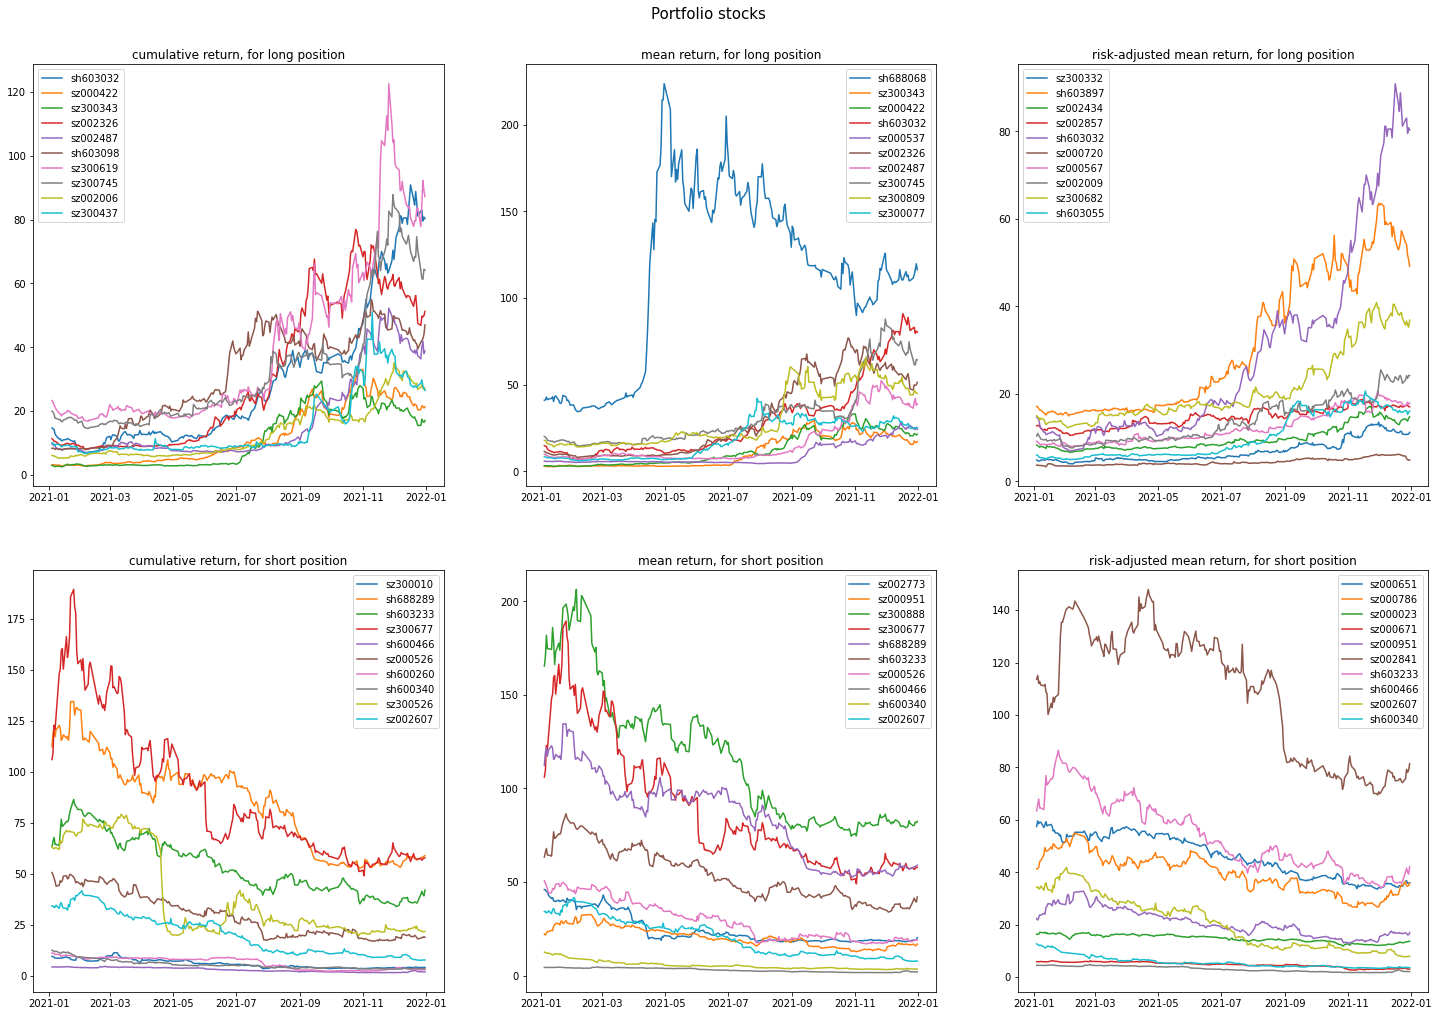

In [17]:
figure, axis = plt.subplots(2, 3, figsize=(25, 16))
figure.subplots_adjust(top=0.93)
figure.suptitle(f'Portfolio stocks', fontsize=15)

title_strategy_names = ['cumulative return', 'mean return', 'risk-adjusted mean return']
title_positions = ['long position', 'short position']
df_returns = [df_cumulative_returns, df_mean_returns, df_risk_adjusted_mean_returns]

for j, df_return in enumerate(df_returns):
    for i, pos in enumerate(title_positions):
        if i == 1:
            for ticker in df_return['ticker'][-10:]:
                axis[i, j].plot(test_set.loc[test_set['ticker'] == ticker]['close'], label=f'{ticker}')
            axis[i, j].legend(df_return['ticker'][-10:])
            axis[i, j].set_title(f'{title_strategy_names[j]}, for {title_positions[i]}')
            continue
        for ticker in df_return['ticker'][:10]:
            axis[i, j].plot(test_set.loc[test_set['ticker'] == ticker]['close'], label=f'{ticker}')
            axis[i, j].set_title(f'{title_strategy_names[j]}, for {title_positions[i]}')
        axis[i, j].legend(df_return['ticker'][:10])

''' volatility '''
# for ticker in df_cumulative_returns['ticker'][:10]:
#     plt.plot(np.diff(test_set.loc[test_set['ticker'] == ticker]['close']), label=f'{ticker}')
# plt.legend(df_cumulative_returns['ticker'][:10])

# for ticker in df_cumulative_returns['ticker'][-10:]:
#     plt.plot(np.diff(test_set.loc[test_set['ticker'] == ticker]['close']), label=f'{ticker}')
# plt.legend(df_cumulative_returns['ticker'][-10:])

In [18]:
class BackTester:
    n = 10
    def __init__(self, df_returns, month_test_set, first_trading_day):
        self.portfolio = 1000000
        self.df_returns = df_returns
        self.month_test_set = month_test_set
        self.first_trading_day = first_trading_day
        self.portfolio_history = []
        self.top_stocks = {}
        self.top_stocks_bought = defaultdict()

    def init_top_stocks(self):
        for i in self.df_returns['ticker'][:BackTester.n]:
            self.top_stocks[i] = 0
        return self.top_stocks
    
    def buy_on_first_day(self):
        """ 
        buying on first day 
        there's a problem here that there are stocks that aren't traded on the first trading day of month.
        so we come up with solution of buying when is possible
        """
        money_per_stock = self.portfolio / BackTester.n
        first_day = self.first_trading_day
        for index, row in self.month_test_set.sort_index().iterrows():
            if str(index) == first_day:
                if row['ticker'] in self.top_stocks:
                    self.top_stocks_bought[row['ticker']] = math.floor(money_per_stock / row['close'])
                    self.portfolio -= row['close'] * self.top_stocks_bought[row['ticker']]
                    # print(f"ticker={row['ticker']} price={row['close']} volume={top_stocks[row['ticker']]}, portfolio={portfolio}")
            else:
                break
        return self.top_stocks_bought

    def buy_when_possible(self):
        money_per_stock = self.portfolio / BackTester.n
        for index, row in self.month_test_set.sort_index().iterrows():
            if len(self.top_stocks_bought) == len(self.top_stocks):
                break
            if row['ticker'] in self.top_stocks and row['ticker'] not in self.top_stocks_bought:
                self.top_stocks_bought[row['ticker']] = math.floor(money_per_stock / row['close'])
                self.portfolio -= row['close'] * self.top_stocks_bought[row['ticker']]
    
    def get_portfolio_return_for_month(self):
        last_day = self.first_trading_day
        cur_portfolio = 0
        k = 0
        k_arr = []
        for index, row in self.month_test_set.sort_index().iterrows():
            new_day = str(index)
            if new_day != last_day:
                self.portfolio_history.append(self.portfolio + cur_portfolio)
                k_arr.append(k)
                k = 0
                cur_portfolio = 0
                last_day = new_day
            if row['ticker'] in self.top_stocks_bought:
                cur_portfolio += row['close'] * self.top_stocks_bought[row['ticker']]
                k += 1
        self.portfolio_history.append(self.portfolio + cur_portfolio)
        return self.portfolio_history

    def get_monthly_return_df(self):
        df_monthly_return = pd.DataFrame(self.portfolio_history)
        df_monthly_return['daily return'] = df_monthly_return[0].pct_change()
        return df_monthly_return

    def get_montly_return_pct_change(self):
        return self.get_monthly_return_df().pct_change().dropna()[0]

    def std_dev(self, data):
        n = len(data)
        mean = sum(data) / n
        deviations = sum([(x - mean) ** 2 for x in data])
        variance = deviations / (n - 1)
        s = variance ** (1 / 2)
        return s

    def sharpe_ratio(self, data, trading_days, risk_free_rate=0.0):
        mean_daily_return = sum(data) / len(data)
        s = self.std_dev(data)
        daily_sharpe_ratio = (mean_daily_return - risk_free_rate) / s
        sharpe_ratio = trading_days ** (1 / 2) * daily_sharpe_ratio
        return sharpe_ratio
        

Once a portfolio is established at $t = 0$, it is kept unaltered during a predefined "holding period", which can be $1$ month or longer. (In this case we are holding $1$, $3$ and $6$ months).

In [19]:
def work(data, debug=0):
    years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
    for i in range(len(years) - 1):
        test_set = data.loc[years[i]]
        df_cumulative_returns, df_mean_returns, df_risk_adjusted_mean_returns = get_all_strategy_returns(test_set)

        first_trading_day = str(data.loc[years[i + 1]].index[0])
        one_month_set = data.loc[first_trading_day : f'{years[i + 1]}-02-01']
        two_months_set = data.loc[first_trading_day : f'{years[i + 1]}-04-01']
        three_months_set = data.loc[first_trading_day : f'{years[i + 1]}-07-01']

        figure, axis = plt.subplots(3, 3, figsize=(25, 16))
        figure.subplots_adjust(top=0.93)

        figure.suptitle(f'Backtesting for {years[i + 1]}', fontsize=15)

        sets = [one_month_set, two_months_set, three_months_set]
        returns_dfs = [df_cumulative_returns, df_mean_returns, df_risk_adjusted_mean_returns]

        title_strategy_names = ['cumulative return', 'mean return', 'risk-adjusted mean return']
        holding_period = ['1 month holding', '3 months holding', '6 months holding']
        for i, return_df in enumerate(returns_dfs):
            for j, set in enumerate(sets):
                strategy_backtester = BackTester(return_df, set, first_trading_day)
                strategy_backtester.init_top_stocks()
                strategy_backtester.buy_on_first_day()
                portfolio_history = strategy_backtester.get_portfolio_return_for_month()
                if debug:
                    print(len(portfolio_history))
                    print(portfolio_history)
                sharp_ratio = strategy_backtester.sharpe_ratio(strategy_backtester.get_montly_return_pct_change(), len(portfolio_history))
                axis[i, j].plot(portfolio_history)
                axis[i, j].set_title(f'{title_strategy_names[i]}, {holding_period[j]}, with sharp ratio = {round(sharp_ratio, 2)}')
                axis[i, j].set_xlabel('trading day')
                axis[i, j].set_ylabel('protfolio sum')
        plt.show()

Here are the backtesting results.

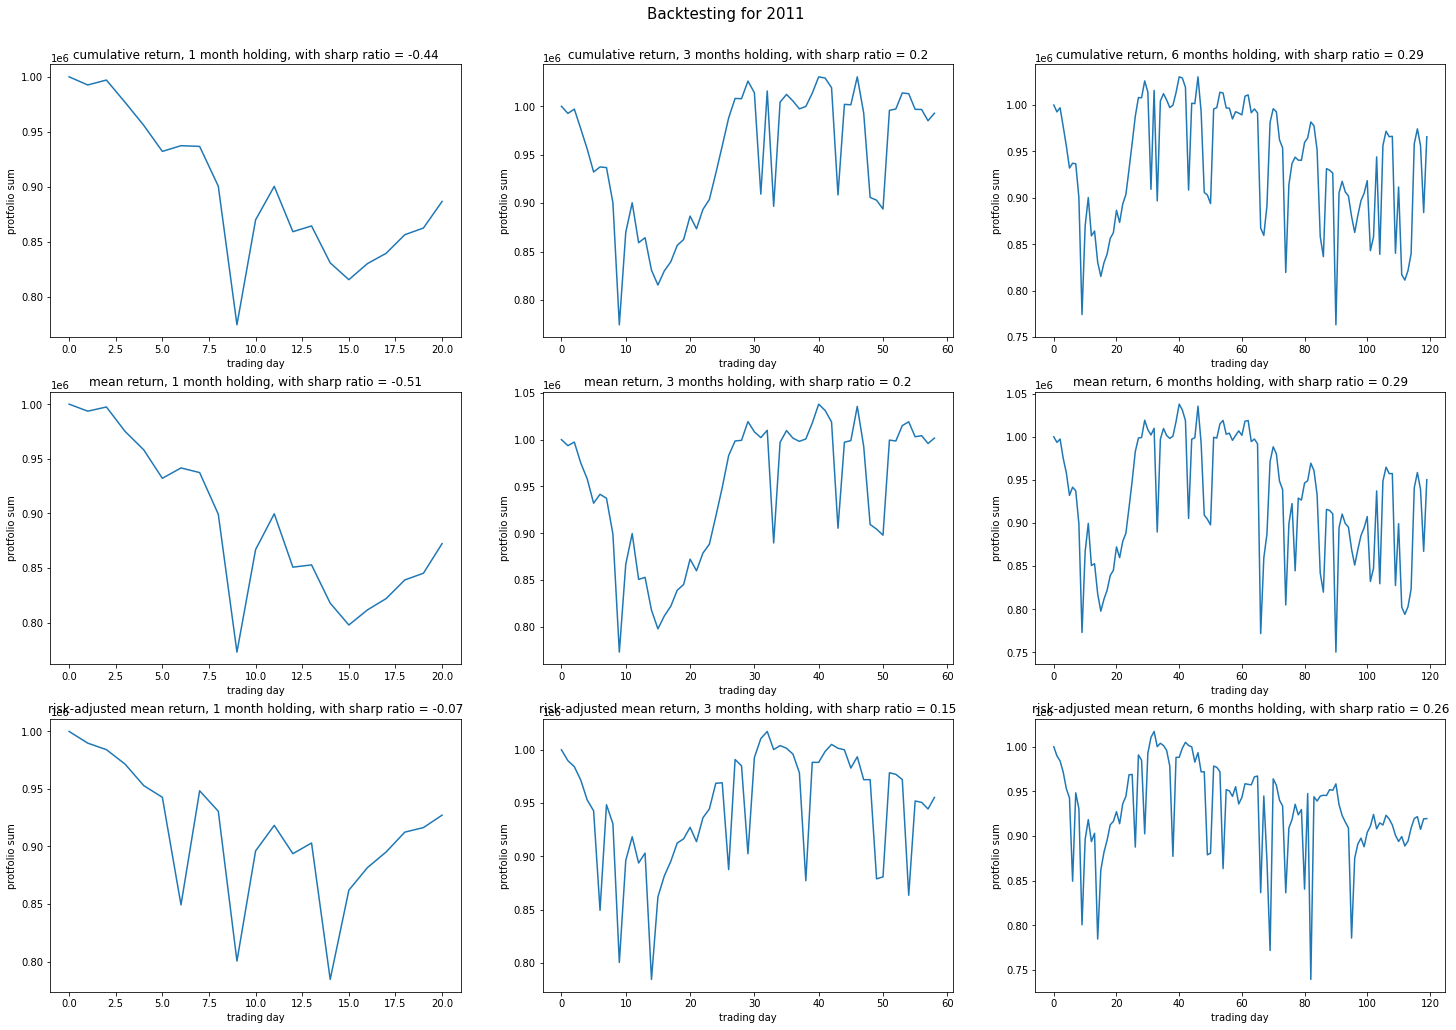

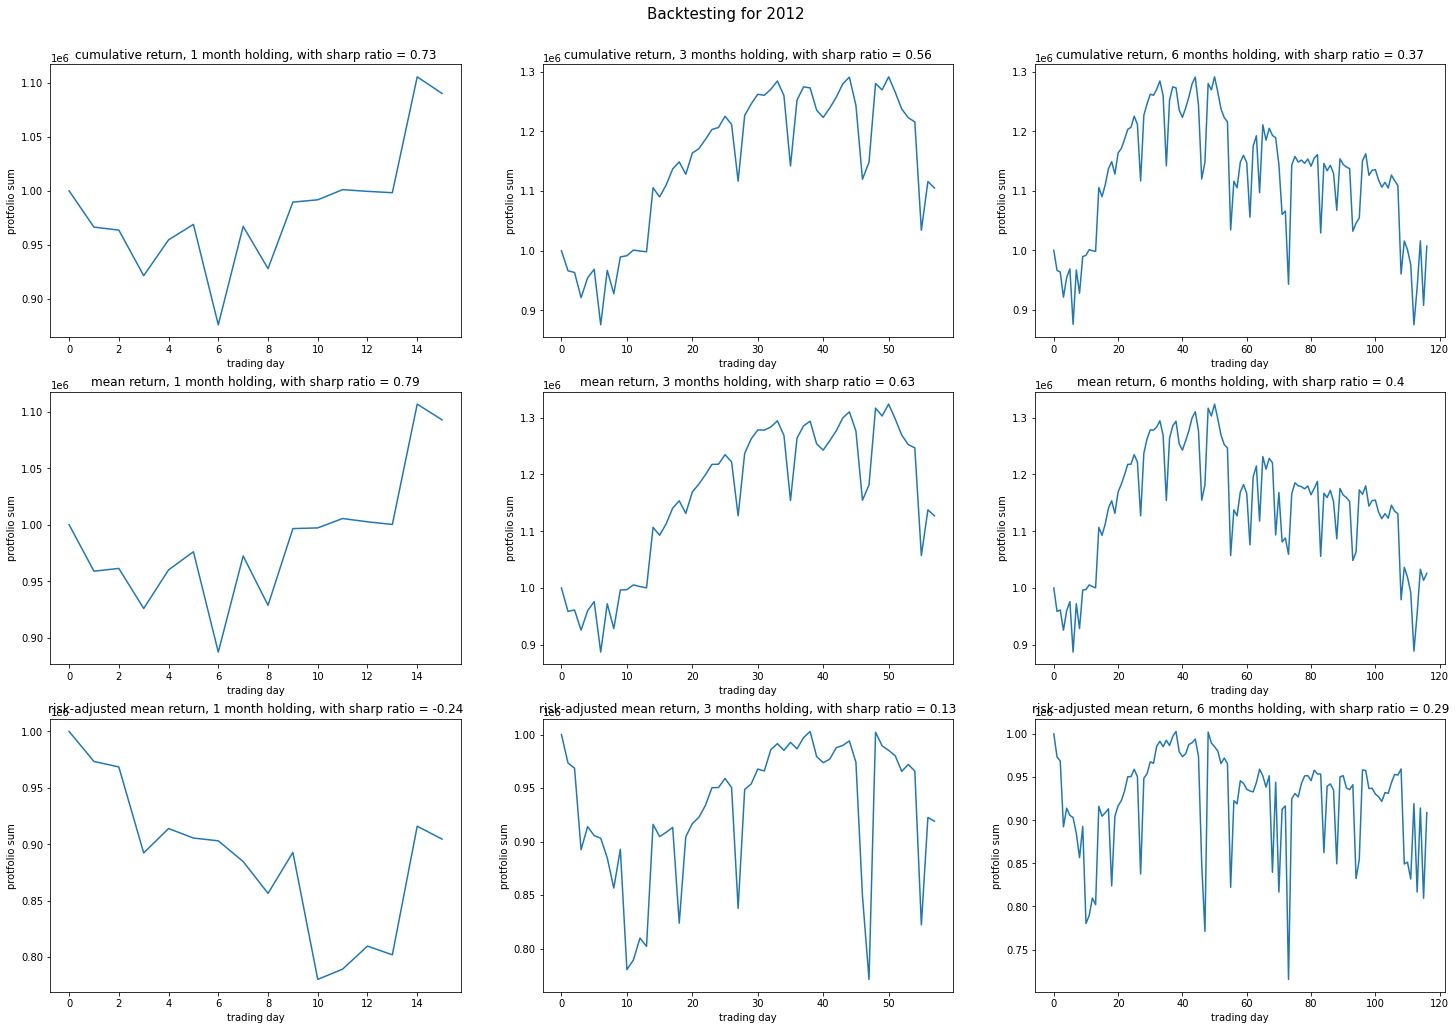

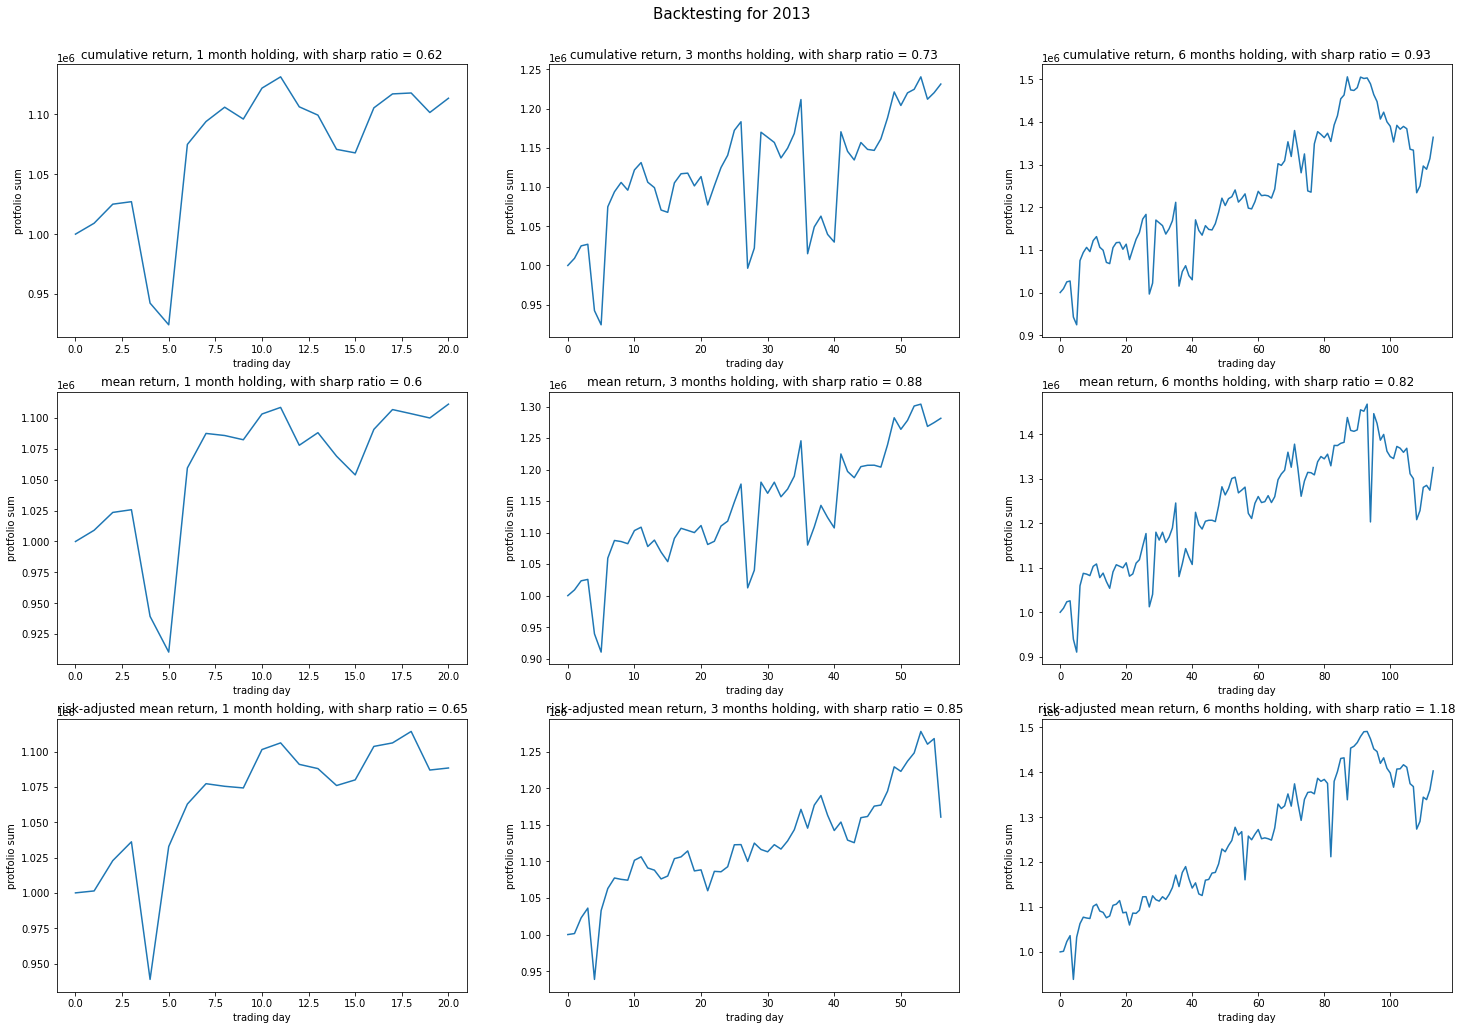

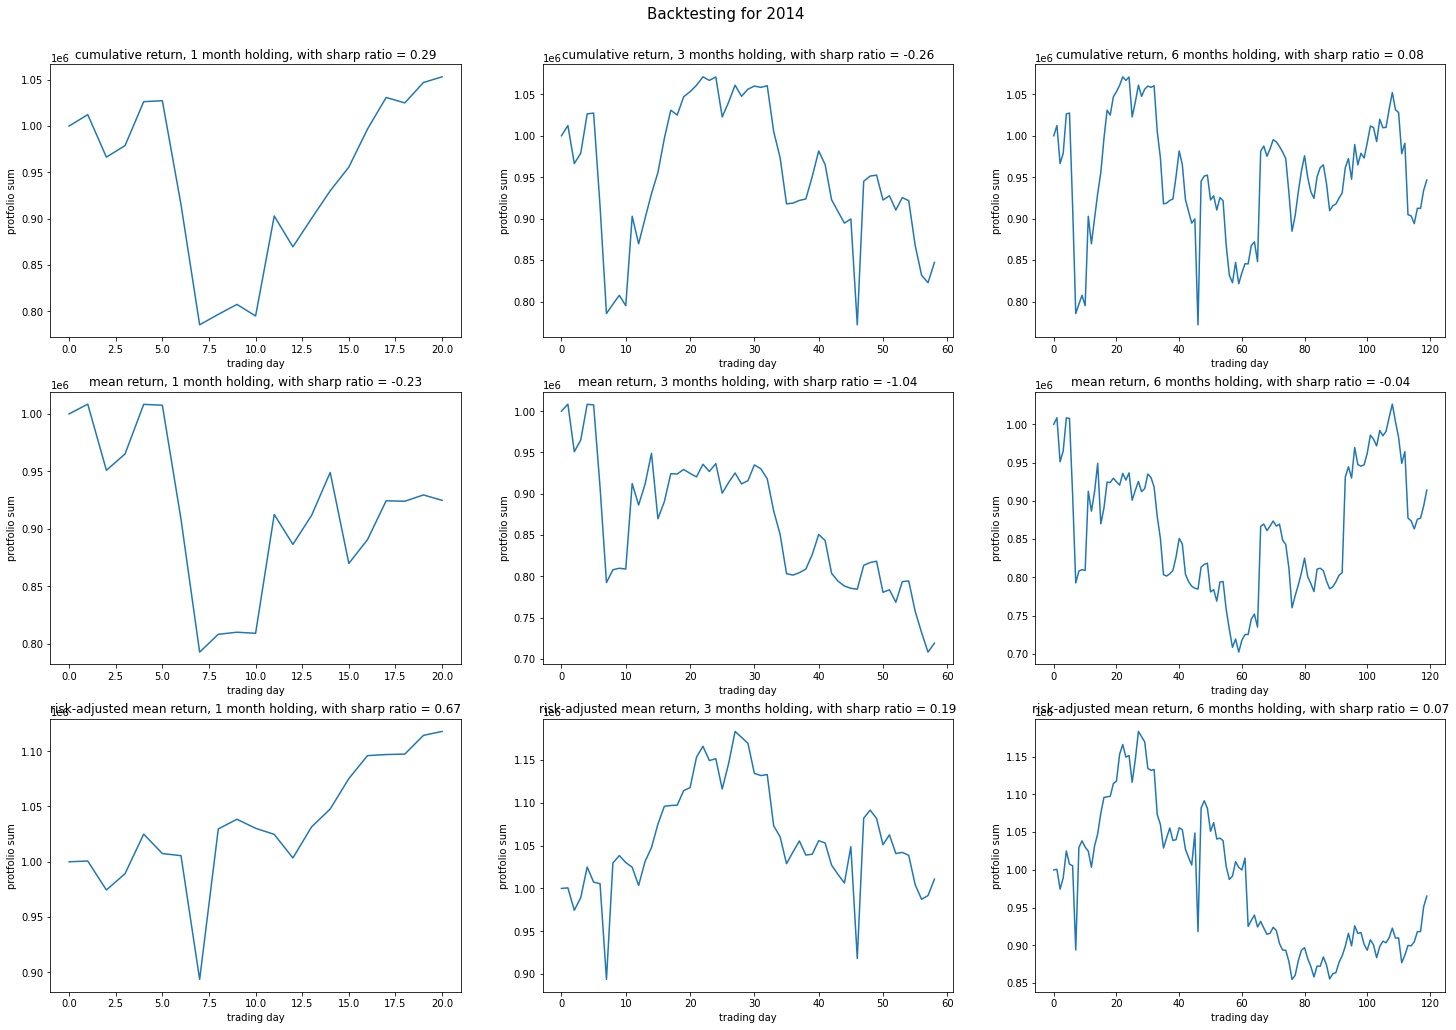

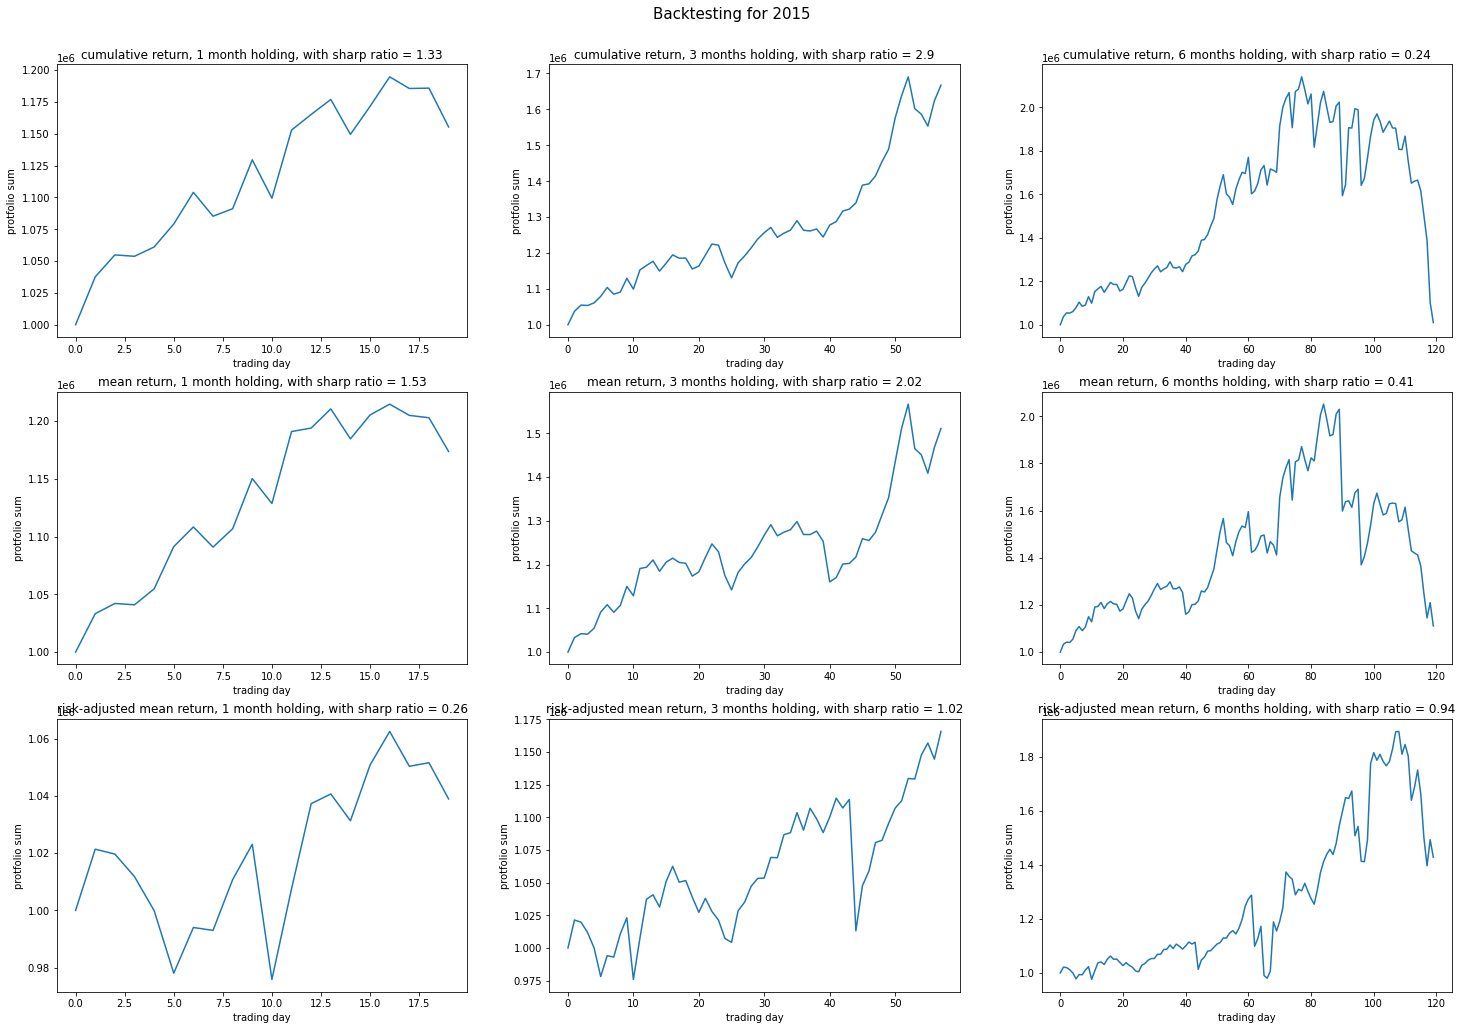

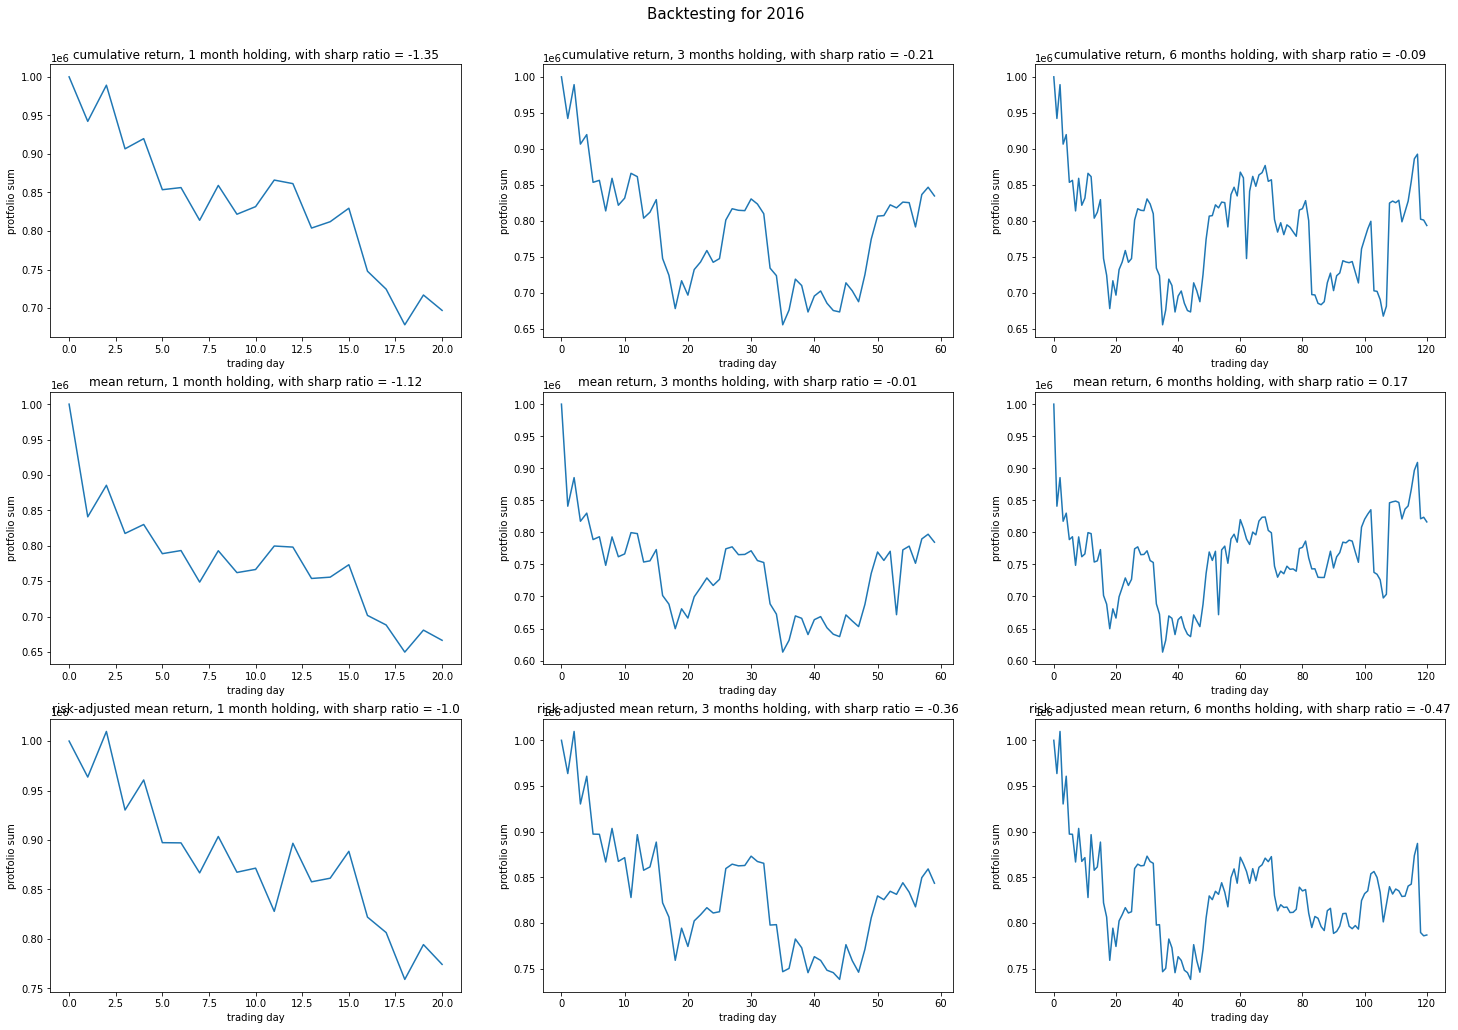

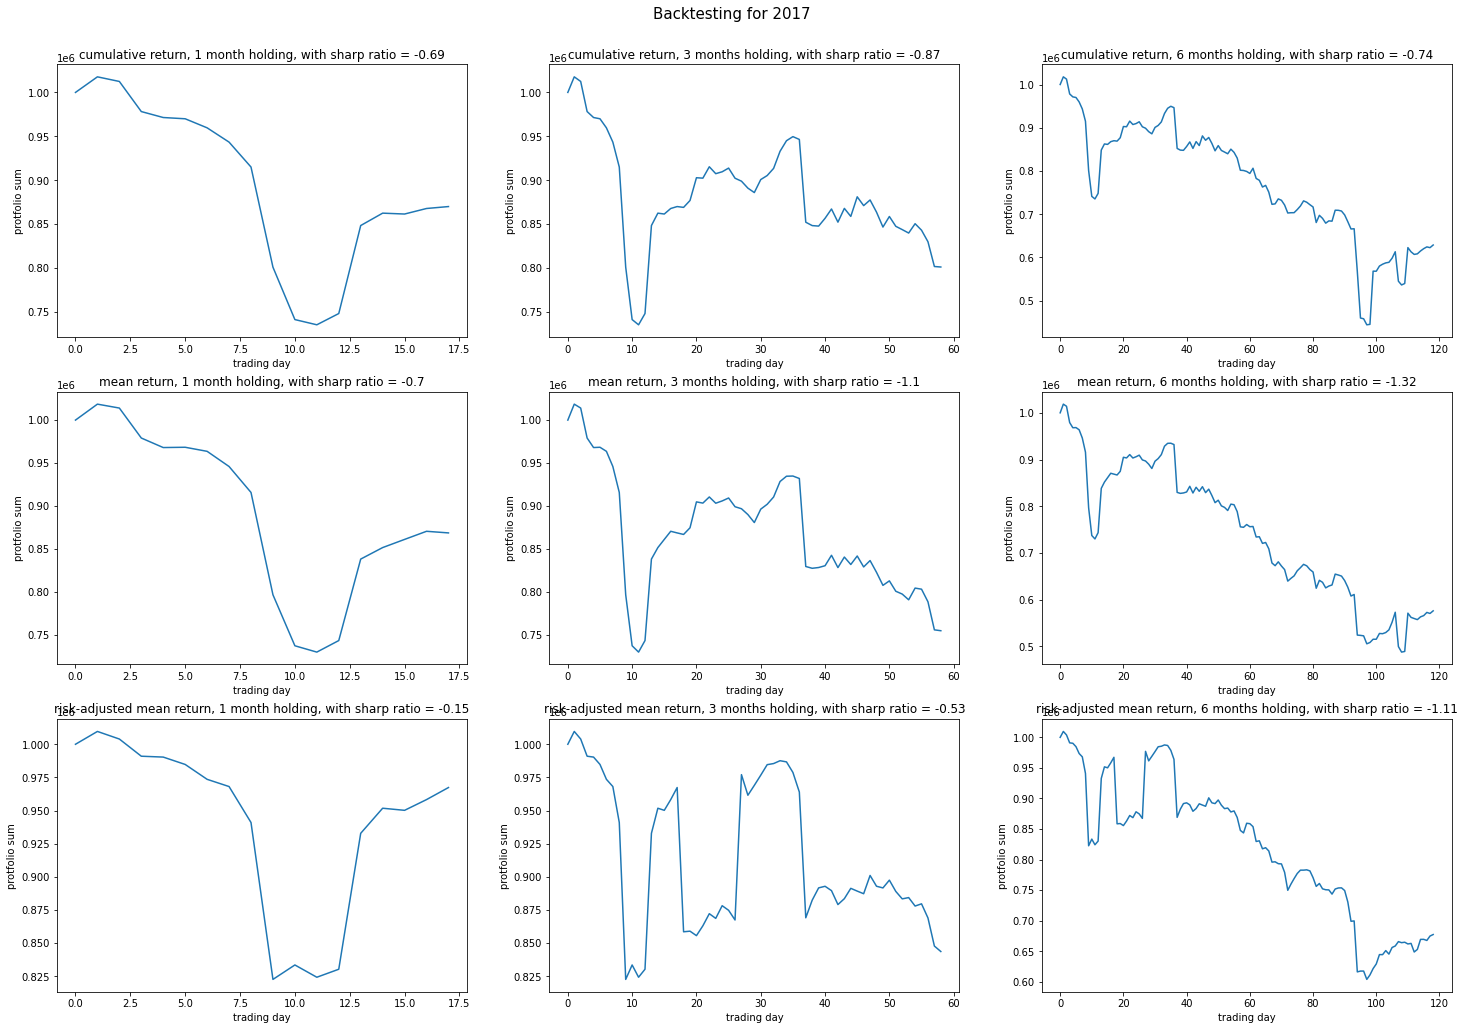

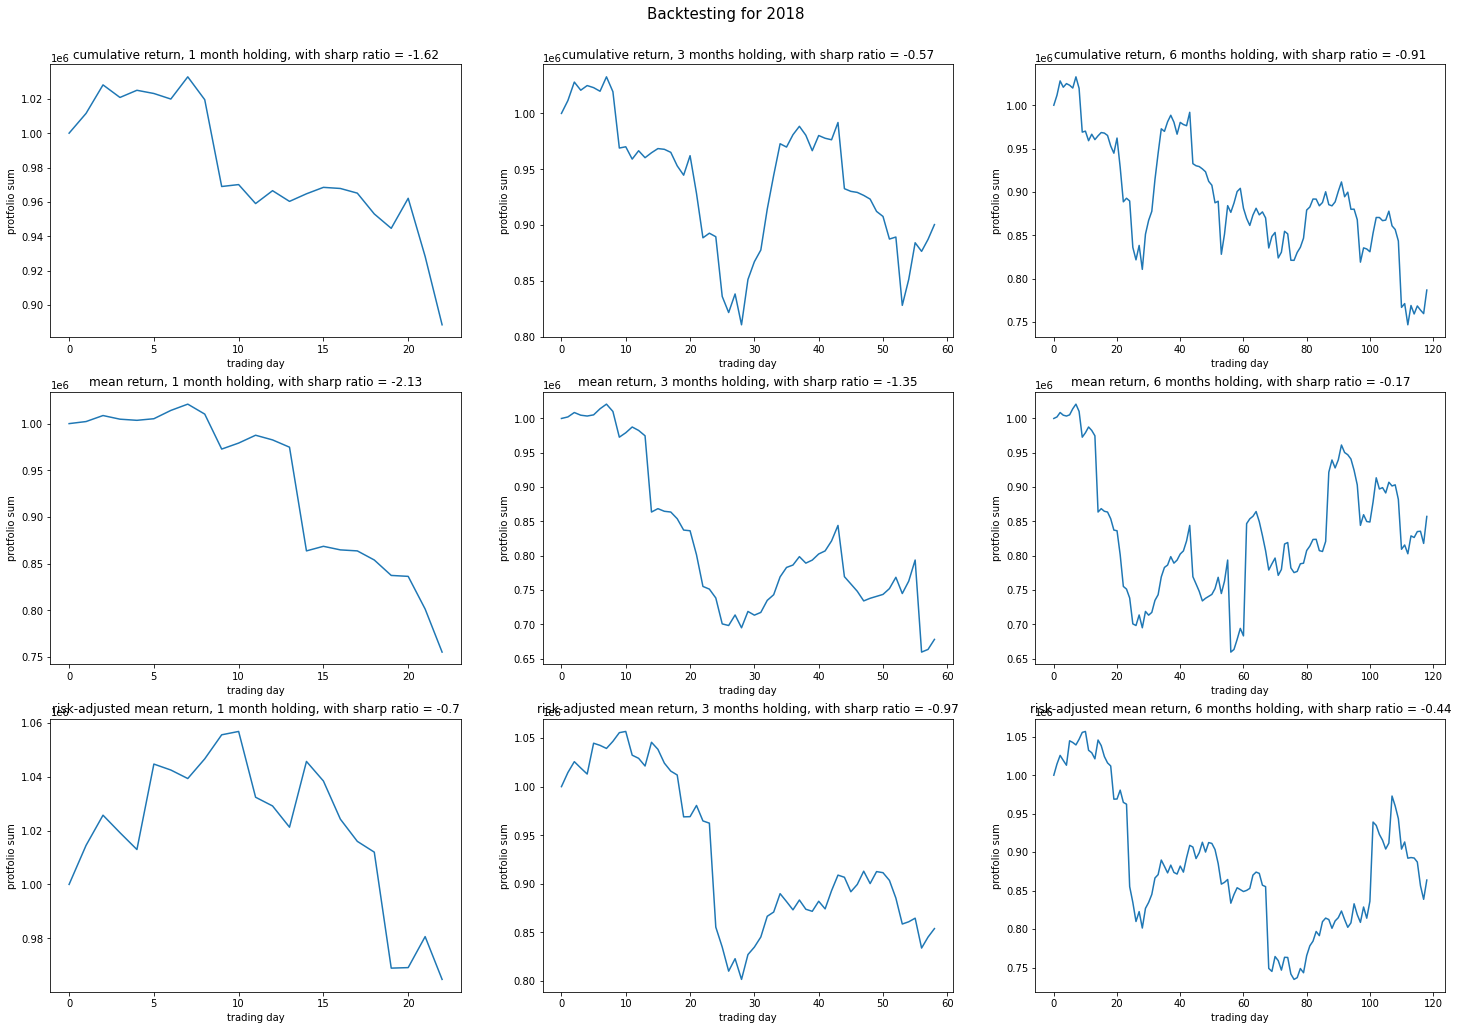

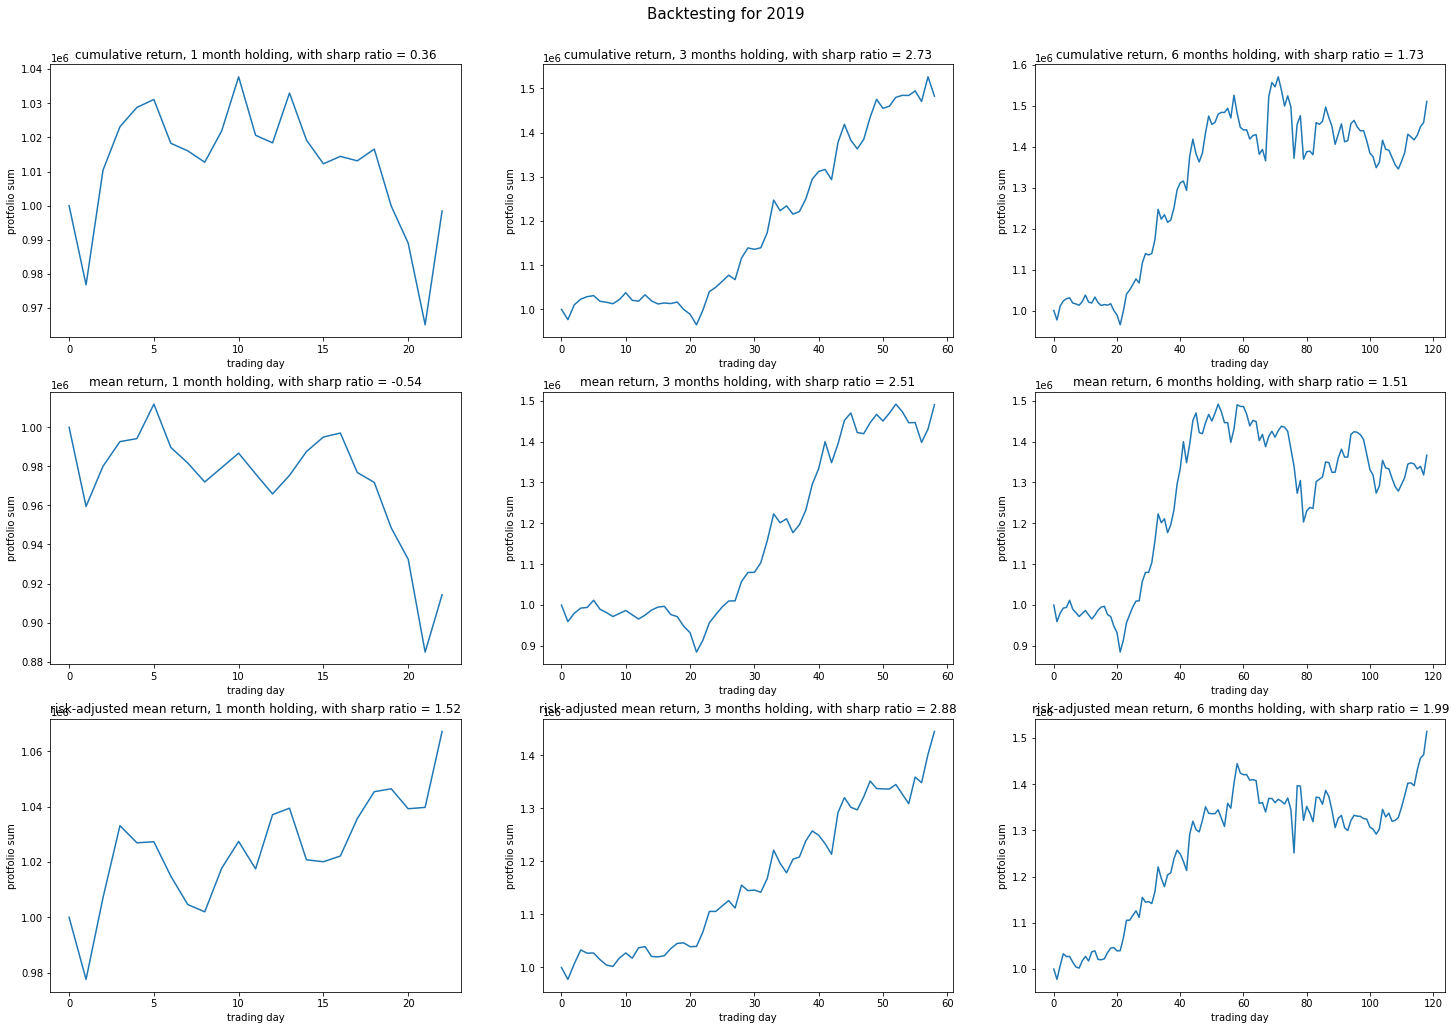

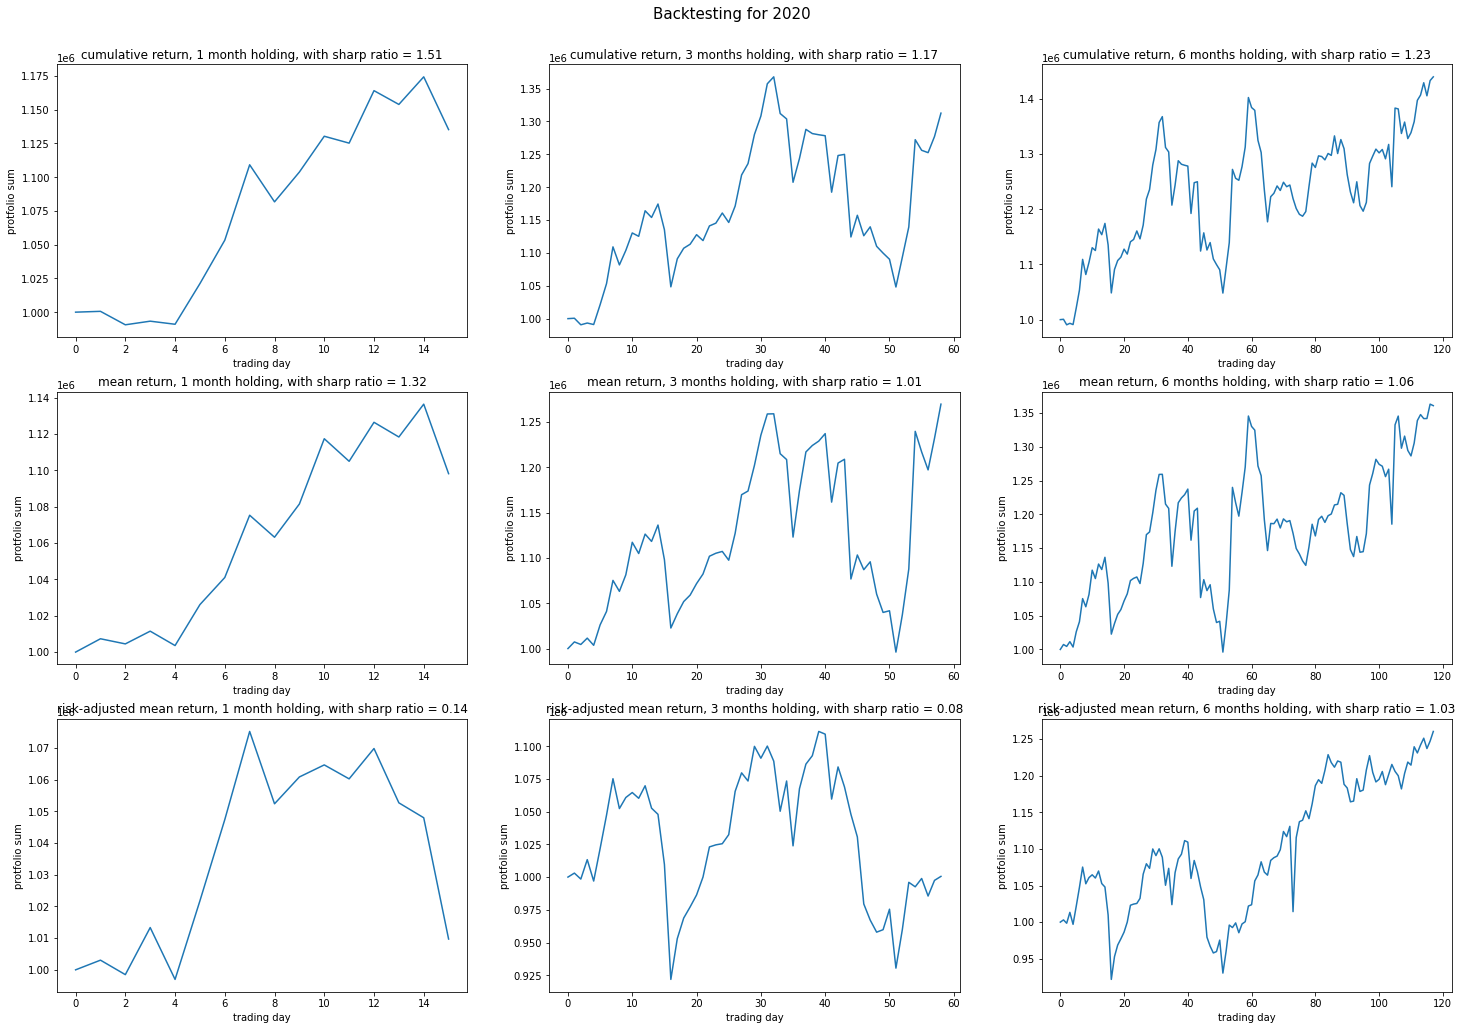

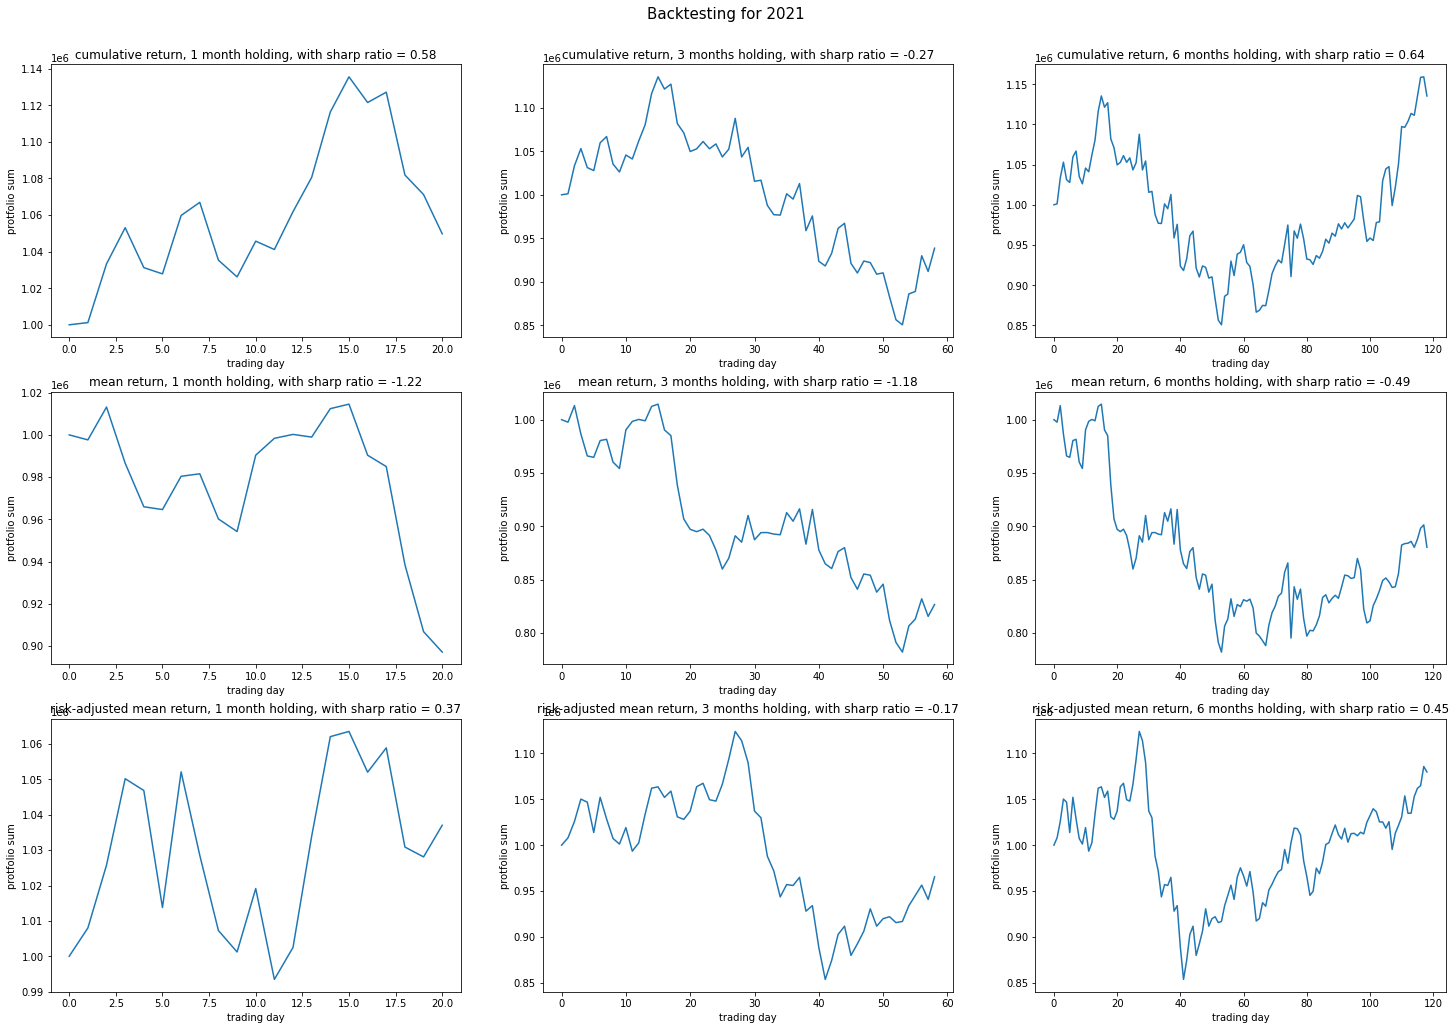

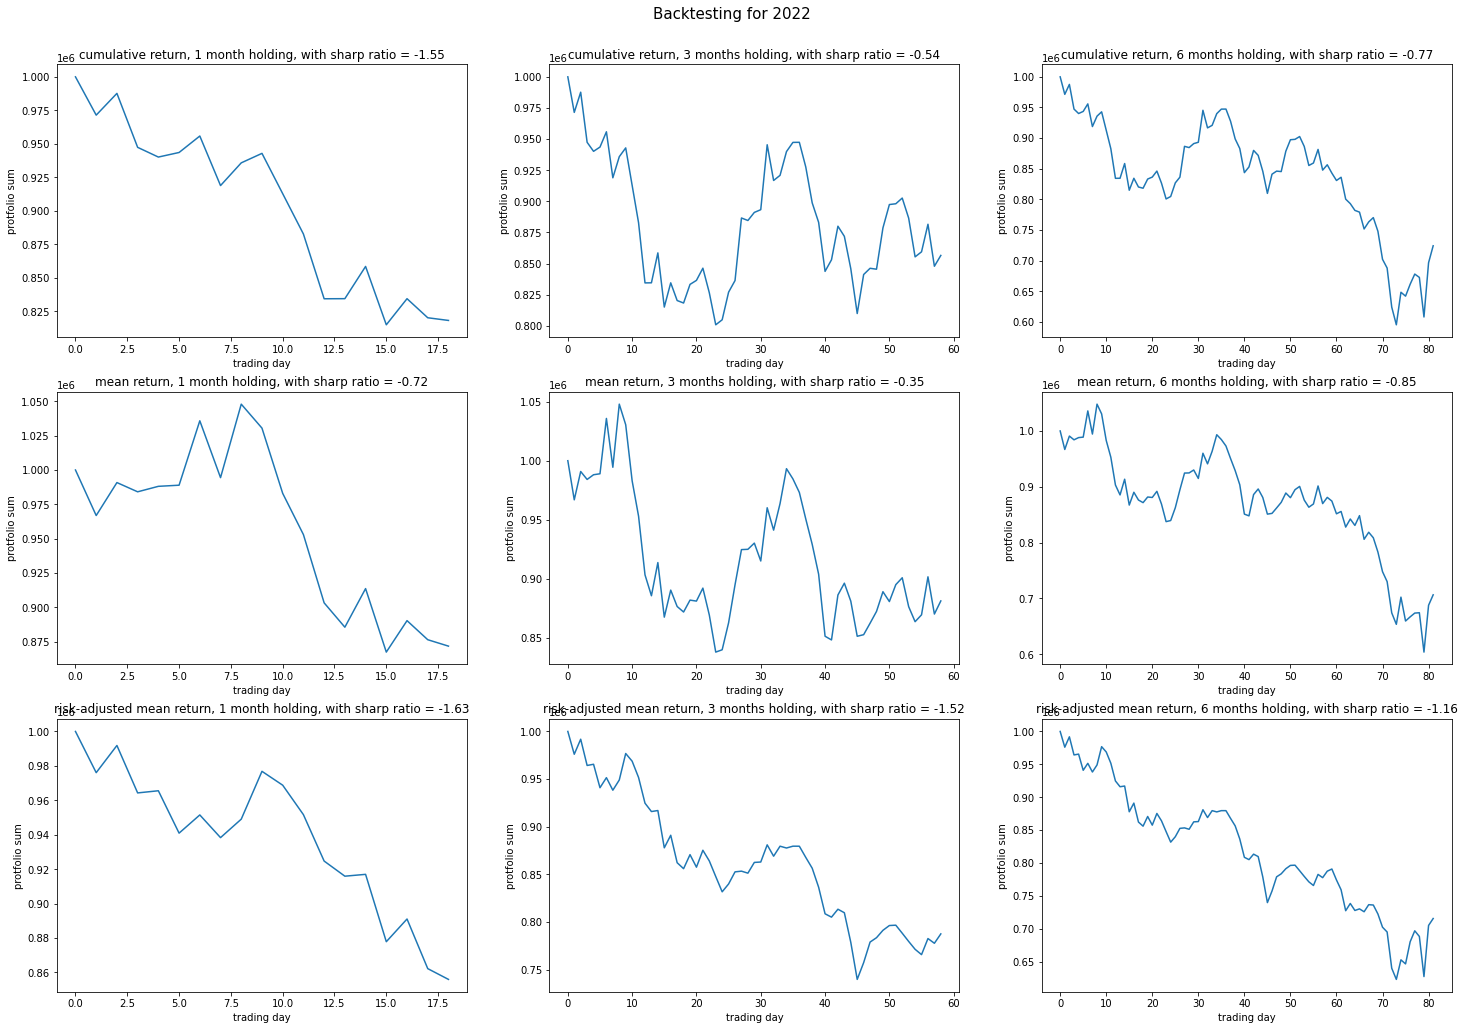

In [23]:
work(data)